In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [8]:
def read_file(filename):
    df = pd.read_csv(filename)
    print(df.shape)
    df['label'] = df['label'].apply(lambda x: x.strip().lower())
    return df

In [11]:
# training 5400
# testing01 300-10

FILE_HO_TRAIN = 'training.csv'
FILE_HO_TEST = 'testingv1.csv'

In [12]:
df_ho_train = read_file(FILE_HO_TRAIN)
df_ho_test = read_file(FILE_HO_TEST)

(5400, 8)
(150, 8)


In [13]:
target_encoder = LabelEncoder()
df_ho_train['Target'] = target_encoder.fit_transform(df_ho_train['label'])
df_ho_test['Target'] = target_encoder.transform(df_ho_test['label'])

In [14]:
x_ho_train = df_ho_train.drop(['label', 'Target'], axis=1)
y_ho_train = df_ho_train['Target']

x_ho_test = df_ho_test.drop(['label', 'Target'], axis=1)
y_ho_test = df_ho_test['Target']

In [28]:
# set same in rapidMiner
# criterion entropy is informationgain
# max depth 10
# min sample leaf 2
# min samples split 4

model = DecisionTreeClassifier(criterion="entropy",max_depth = 10, min_samples_split=4,min_samples_leaf=2)
model.fit(x_ho_train, y_ho_train)
model.score(x_ho_train, y_ho_train)
predicted= model.predict(x_ho_test)
	
accuracy_ho = accuracy_score(predicted, y_ho_test) * 100
print('Akurasi pada Algoritma Decision Tree menggunakan split dengan persentase 90:10 = %s' % accuracy_ho)

Akurasi pada Algoritma Decision Tree menggunakan split dengan persentase 90:10 = 87.33333333333333


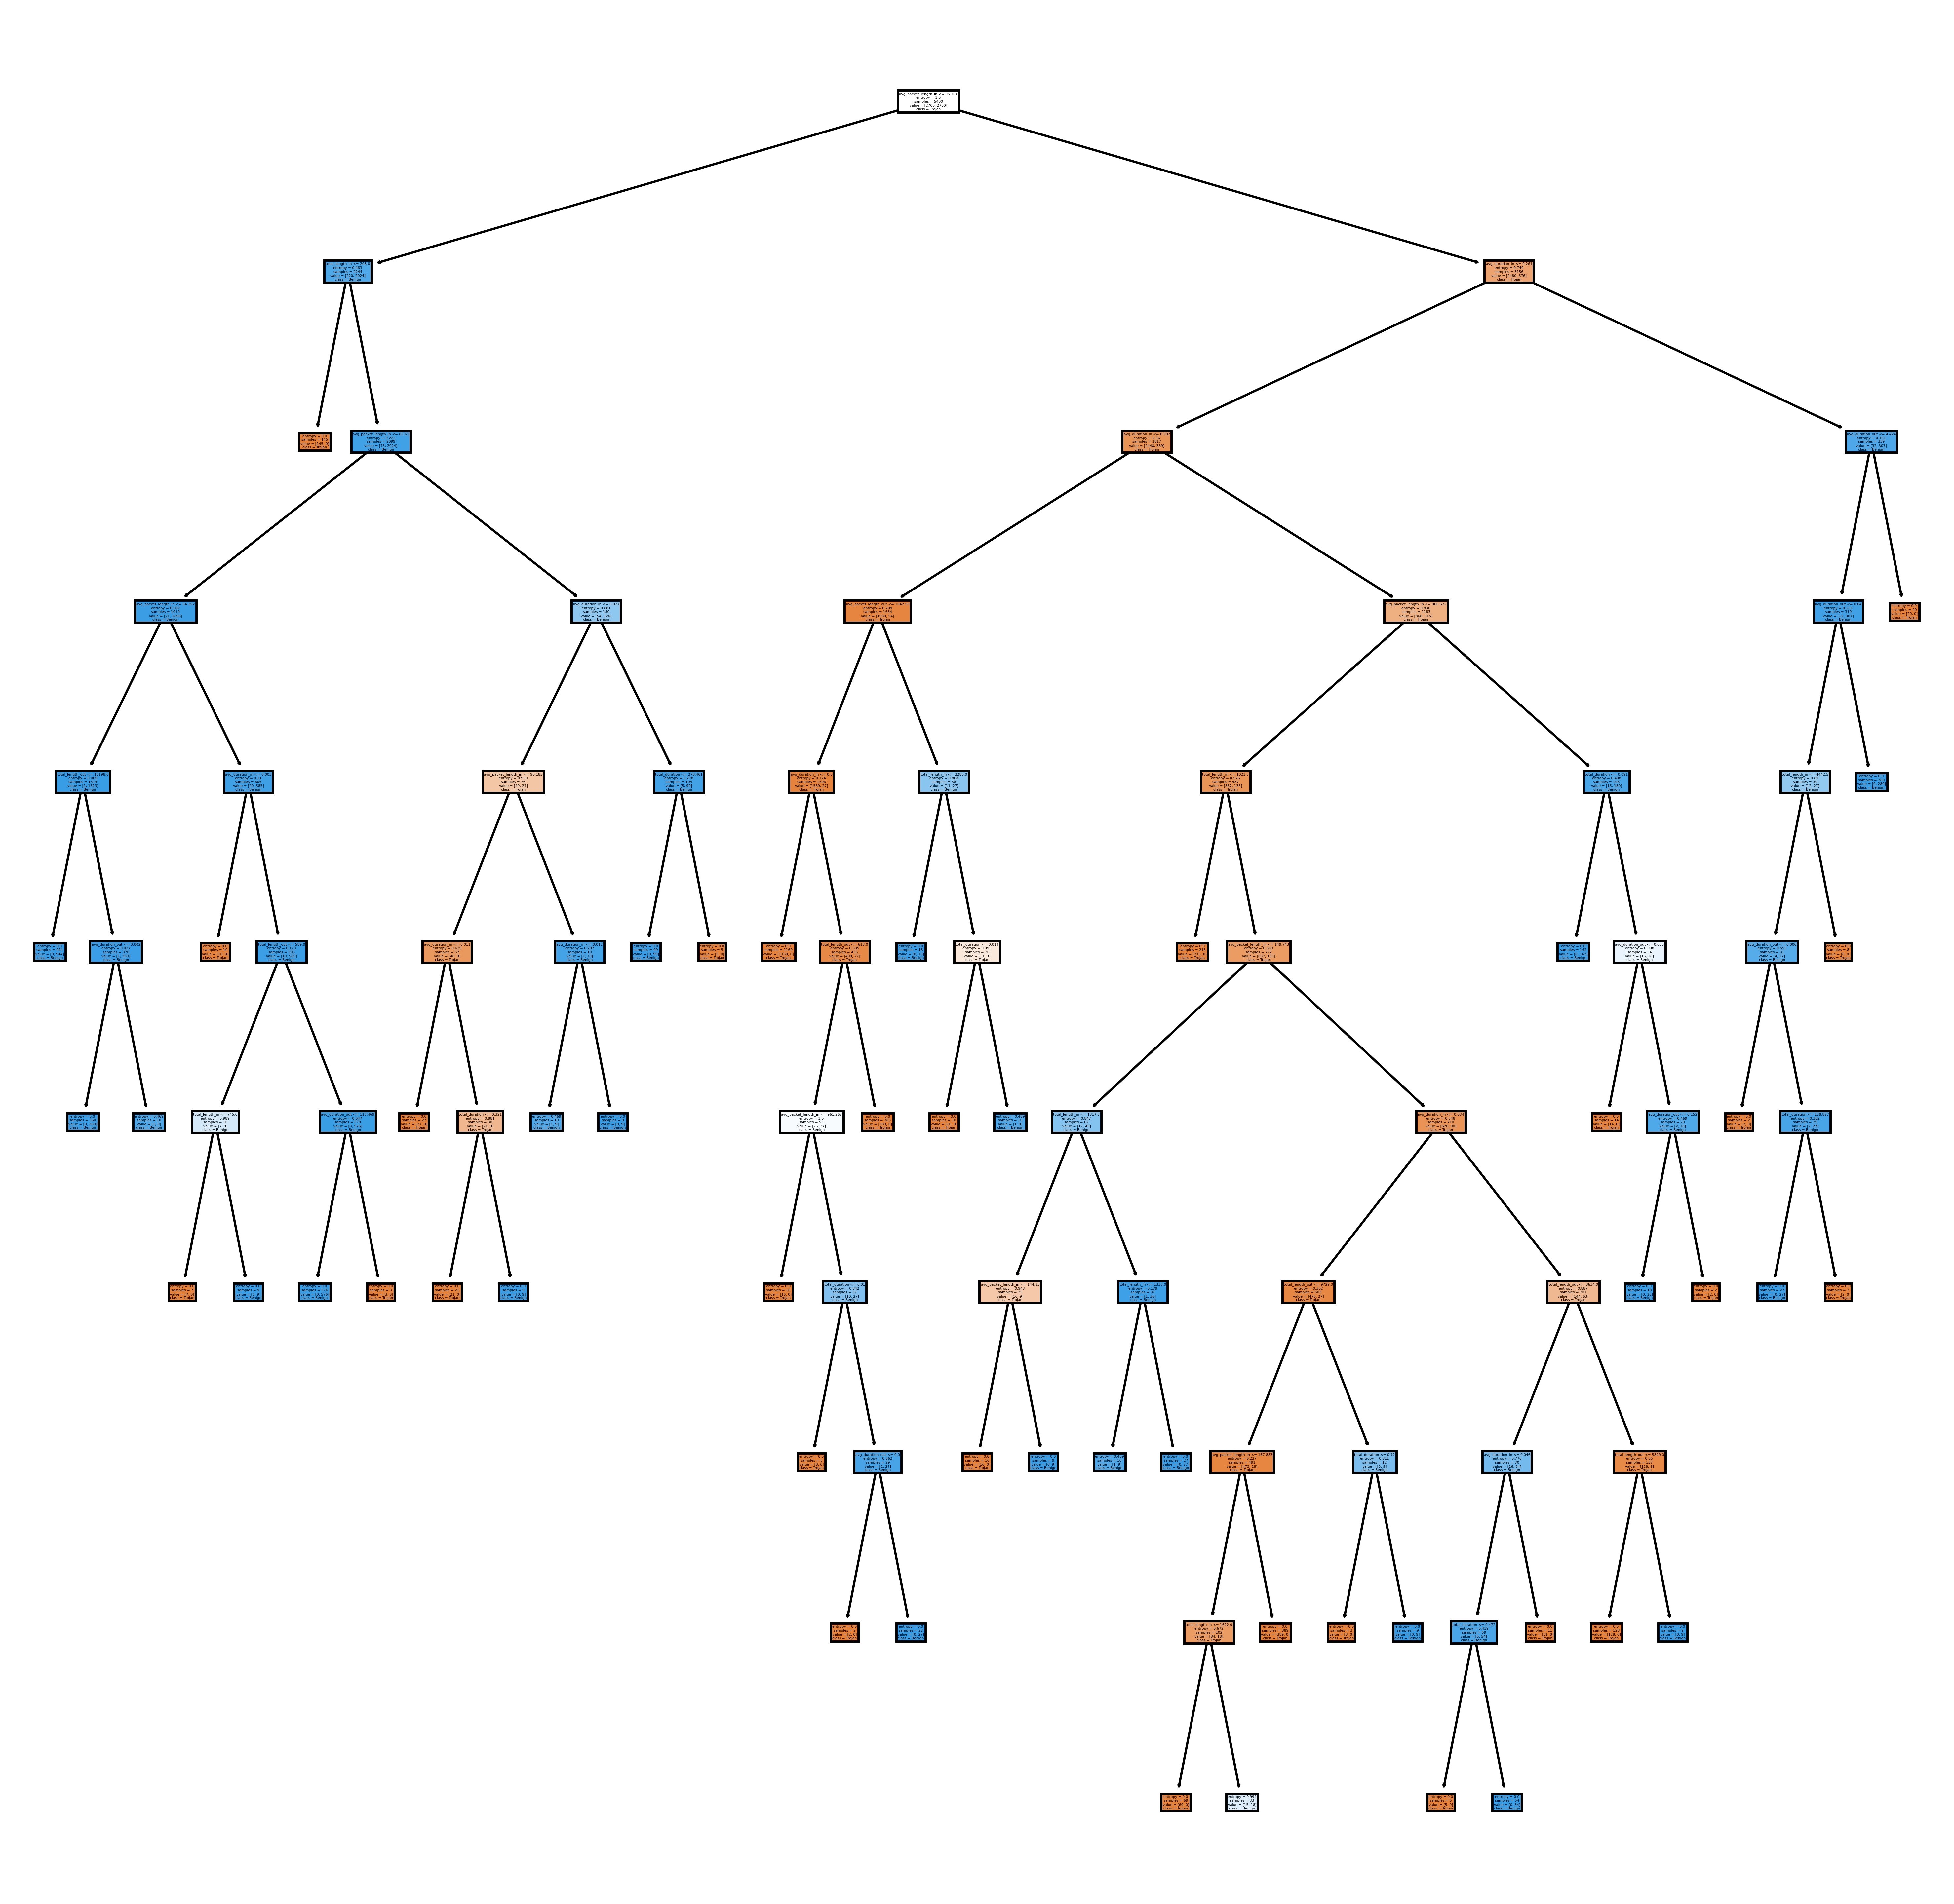

In [25]:
# plot_tree(clf);

fn=['total_length_out','total_length_in','avg_packet_length_out','avg_packet_length_in','avg_duration_out','avg_duration_in','total_duration']
cn=['Trojan', 'Benign']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=500)
plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename01.png')

#fig.savefig('out1.pdf')

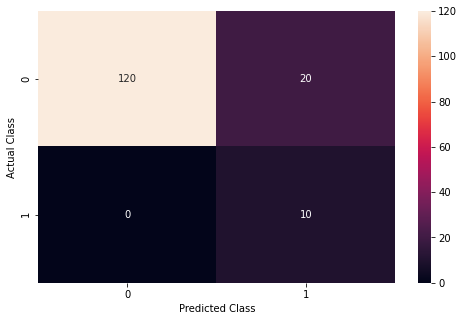

In [26]:
# Create Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
confusion_matrix(y_ho_test, predicted) 

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_ho_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

In [27]:
# Performance Matrix Report - Precision Recall f1score
from sklearn.metrics import classification_report
print (classification_report(y_ho_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       140
           1       0.33      1.00      0.50        10

    accuracy                           0.87       150
   macro avg       0.67      0.93      0.71       150
weighted avg       0.96      0.87      0.89       150

